# Criando Nomes

In [1]:
import pandas as pd

In [8]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [10]:
print(f"Quatidade de nomes: {len(nomes_m) + len(nomes_f)}")


Quatidade de nomes: 400


In [11]:
frames = [nomes_f, nomes_m]

In [14]:
nomes = pd.concat(frames)['nome'].to_frame()

In [16]:
nomes.index = range(nomes.shape[0])

In [18]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
395,WALTER
396,ARLINDO
397,MICHAEL
398,ALVARO


# Incluid ID dos alunos

In [21]:
import numpy as np
np.random.seed(123)

In [22]:
total_alunos = len(nomes)

In [23]:
nomes["id_alunos"] = np.random.permutation(total_alunos) + 1

In [26]:
nomes.sample(5)

,nome,id_alunos
46,FABIANA,358
159,SELMA,118
3,ANTONIA,156
97,BARBARA,201
264,ROBSON,290


In [28]:
dominios = ['@dominioemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [29]:
nomes.sample(5)

,nome,id_alunos,dominio
390,NATANAEL,58,@servicodoemail.com
304,REINALDO,28,@servicodoemail.com
193,LUCILENE,146,@servicodoemail.com
98,THAIS,148,@dominioemail.com.br
202,ANTONIO,205,@dominioemail.com.br


In [47]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [48]:
nomes.sample(5)

,nome,id_alunos,dominio,email
286,MAURO,251,@servicodoemail.com,mauro@servicodoemail.com
176,MARA,375,@dominioemail.com.br,mara@dominioemail.com.br
186,INES,319,@servicodoemail.com,ines@servicodoemail.com
62,FLAVIA,60,@servicodoemail.com,flavia@servicodoemail.com
240,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com


# Criando a tabela Cursos

In [52]:
!pip3 install html5lib
!pip3 install lxml

In [53]:
import html5lib

In [54]:
url = 'https://tabela-cursos.herokuapp.com/index.html'

In [57]:
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [58]:
type(cursos)

list

In [60]:
cursos = cursos[0]

In [61]:
type(cursos)

pandas.core.frame.DataFrame

In [63]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando index cursos

In [65]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)

In [66]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [67]:
cursos['id'] = cursos.index + 1

In [68]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [69]:
cursos.set_index('id', inplace = True)

In [70]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [72]:
nomes.sample(5)

,nome,id_alunos,dominio,email
232,MARCIO,322,@dominioemail.com.br,marcio@dominioemail.com.br
155,CECILIA,144,@servicodoemail.com,cecilia@servicodoemail.com
96,TANIA,211,@dominioemail.com.br,tania@dominioemail.com.br
386,ERIC,114,@dominioemail.com.br,eric@dominioemail.com.br
43,TEREZINHA,158,@dominioemail.com.br,terezinha@dominioemail.com.br


# Matriculando alunos nos cursos

In [79]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [80]:
nomes.sample(5)

,nome,id_alunos,dominio,email,matriculas
334,ALBERTO,245,@servicodoemail.com,alberto@servicodoemail.com,2
14,JESSICA,185,@servicodoemail.com,jessica@servicodoemail.com,1
50,RAFAELA,27,@servicodoemail.com,rafaela@servicodoemail.com,2
220,MANOEL,101,@servicodoemail.com,manoel@servicodoemail.com,1
316,DOMINGOS,150,@dominioemail.com.br,domingos@dominioemail.com.br,2


In [81]:
nomes.matriculas.describe()

count    400.000000
mean       2.070000
std        1.491866
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: matriculas, dtype: float64

In [82]:
import seaborn as sns

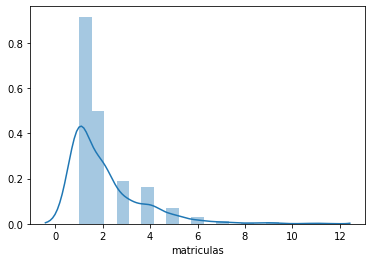

In [84]:
sns.distplot(nomes.matriculas)

In [89]:
nomes.matriculas.value_counts()

1     193
2     105
3      40
4      34
5      15
6       6
7       3
9       2
11      1
8       1
Name: matriculas, dtype: int64

In [90]:
nomes.sample(5)

,nome,id_alunos,dominio,email,matriculas
3,ANTONIA,156,@dominioemail.com.br,antonia@dominioemail.com.br,1
231,RICARDO,336,@servicodoemail.com,ricardo@servicodoemail.com,2
21,VERA,287,@dominioemail.com.br,vera@dominioemail.com.br,2
310,IVAN,263,@servicodoemail.com,ivan@servicodoemail.com,4
207,LUCAS,29,@dominioemail.com.br,lucas@dominioemail.com.br,1


# Selecionando cursos

In [92]:
nomes.sample(5)

,nome,id_alunos,dominio,email,matriculas
278,WILSON,41,@dominioemail.com.br,wilson@dominioemail.com.br,4
153,CLEIDE,368,@dominioemail.com.br,cleide@dominioemail.com.br,5
264,ROBSON,290,@servicodoemail.com,robson@servicodoemail.com,3
183,IRACI,8,@servicodoemail.com,iraci@servicodoemail.com,3
378,DENILSON,335,@servicodoemail.com,denilson@servicodoemail.com,1


In [94]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [98]:
for index, row in nomes.iterrows():
    id = row.id_alunos
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])


In [99]:
matriculas.head()

,id_aluno,id_curso
0,235,14
1,43,20
2,43,11
3,304,11
4,304,1


In [102]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_alunos'})

,quantidade_alunos,nome_do_curso
id_curso,,
1,148,Lógica de programação
2,186,Java para Web
3,95,C# para Web
4,128,Ruby on Rails
5,28,Cursos de Python
6,72,PHP com MySql
7,146,.NET para web
8,1,Novas integrações com Java
9,64,TDD com Java


In [109]:
nomes.head()

,nome,id_alunos,dominio,email,matriculas
0,MARIA,235,@servicodoemail.com,maria@servicodoemail.com,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,2
2,FRANCISCA,304,@dominioemail.com.br,francisca@dominioemail.com.br,4
3,ANTONIA,156,@dominioemail.com.br,antonia@dominioemail.com.br,1
4,ADRIANA,343,@dominioemail.com.br,adriana@dominioemail.com.br,1


In [110]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [111]:
matriculas.head()

,id_aluno,id_curso
0,235,14
1,43,20
2,43,11
3,304,11
4,304,1


In [112]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_alunos'})

In [113]:
matriculas_por_curso.head()

,quantidade_alunos,nome_do_curso
id_curso,,
1,148,Lógica de programação
2,186,Java para Web
3,95,C# para Web
4,128,Ruby on Rails
5,28,Cursos de Python


# Saída em diferentes formatos

In [114]:
matriculas_por_curso.head()

,quantidade_alunos,nome_do_curso
id_curso,,
1,148,Lógica de programação
2,186,Java para Web
3,95,C# para Web
4,128,Ruby on Rails
5,28,Cursos de Python


In [115]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [117]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_alunos,nome_do_curso
0,148,Lógica de programação
1,186,Java para Web
2,95,C# para Web
3,128,Ruby on Rails
4,28,Cursos de Python
5,72,PHP com MySql
6,146,.NET para web
7,1,Novas integrações com Java
8,64,TDD com Java
9,68,Código limpo com C#


In [118]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_alunos":{"1":148,"2":186,"3":95,"4":128,"5":28,"6":72,"7":146,"8":1,"9":64,"10":68,"11":168,"12":19,"13":34,"14":89,"15":86,"16":90,"17":59,"18":19,"19":95,"20":61},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [119]:
matriculas_html = matriculas_por_curso.to_html()

In [121]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>148</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>186</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>95</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>128</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>28</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>72</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>146</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>64</td>


# Criando banco sql

In [123]:
!pip install sqlalchemy

In [125]:
from sqlalchemy import create_engine, MetaData, Table

In [126]:
engine = create_engine('sqlite:///:memory:')

In [127]:
engine

Engine(sqlite:///:memory:)

In [128]:
type(engine)

sqlalchemy.engine.base.Engine

In [129]:
matriculas_por_curso.head(3)

,quantidade_alunos,nome_do_curso
id_curso,,
1,148,Lógica de programação
2,186,Java para Web
3,95,C# para Web


In [130]:
matriculas_por_curso.to_sql('matriculas', engine)

In [134]:
print(engine.table_names())

['matriculas']


# Buscando do banco sql

In [138]:
query = 'select * from matriculas where quantidade_alunos < 20'

In [139]:
pd.read_sql(query, engine)

,id_curso,quantidade_alunos,nome_do_curso
0,8,1,Novas integrações com Java
1,12,19,Hardware básico
2,18,19,Programação funcional


In [141]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])

,nome_do_curso,quantidade_alunos
0,Lógica de programação,148
1,Java para Web,186
2,C# para Web,95
3,Ruby on Rails,128
4,Cursos de Python,28
5,PHP com MySql,72
6,.NET para web,146
7,Novas integrações com Java,1
8,TDD com Java,64
9,Código limpo com C#,68


In [142]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])

In [148]:
muitas_matriculas = muitas_matriculas.query('quantidade_alunos > 90')

In [149]:
muitas_matriculas

,nome_do_curso,quantidade_alunos
0,Lógica de programação,148
1,Java para Web,186
2,C# para Web,95
3,Ruby on Rails,128
6,.NET para web,146
10,Preparatório para certificação Java,168
18,Boas práticas em Java,95


# Escrevendo no banco

In [150]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [152]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']
